In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver
import gas_phase_data
import numpy as np
import apogee_analysis as aah

In [3]:
import sys
sys.path.append("../")
import surp
import multizone_sim
# from python_packages.plotting import rc_params

In [4]:
mc = ModelComparer(["k10_f_0_1", "k10_f_0_2", "k10_f_0_3", "k10_f_0_4", "k10_f_0_5", "k10_f_0_6"], labels=["0.1", "0.2", "0.3", "0.4", "0.5", "0.6"])

# Mean abundance star tracks

In [10]:
for f_agb in np.arange(0.1, 0.7, 0.1):
    y_c = 0.00724
    y_agb = 0.00163
    y_cc = 0.005

    alpha_agb = f_agb*y_c/y_agb
    alpha_cc = (y_c - alpha_agb*y_agb)/y_cc

    print("f_agb = %1.1f" % f_agb)
    print("alpha_agb = %1.3f" % alpha_agb)
    print("alpha_cc = %1.3f \n" % alpha_cc)

f_agb = 0.1
alpha_agb = 0.444
alpha_cc = 1.303 

f_agb = 0.2
alpha_agb = 0.888
alpha_cc = 1.158 

f_agb = 0.3
alpha_agb = 1.333
alpha_cc = 1.014 

f_agb = 0.4
alpha_agb = 1.777
alpha_cc = 0.869 

f_agb = 0.5
alpha_agb = 2.221
alpha_cc = 0.724 

f_agb = 0.6
alpha_agb = 2.665
alpha_cc = 0.579 



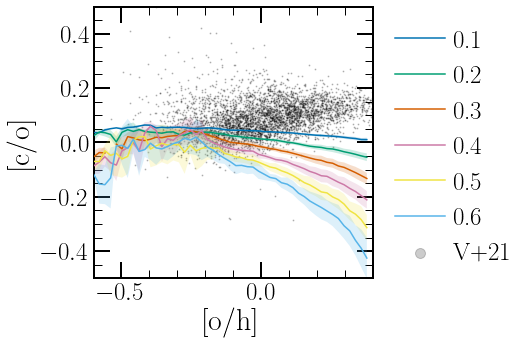

saved


In [9]:
fig, ax = plt.subplots()
ax.set_ylim(-0.5, 0.5)
mc.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), ax=ax, filename="k10_alpha_cooh")

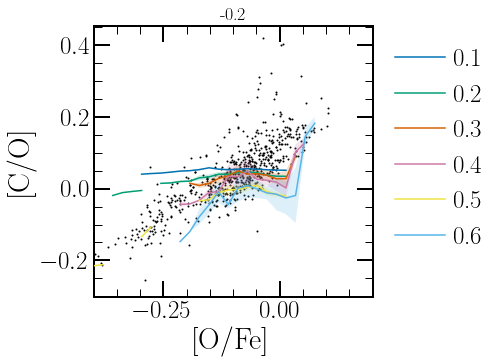

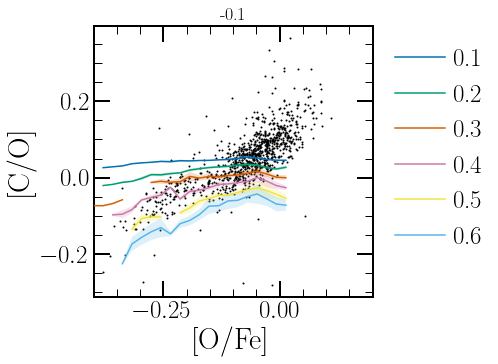

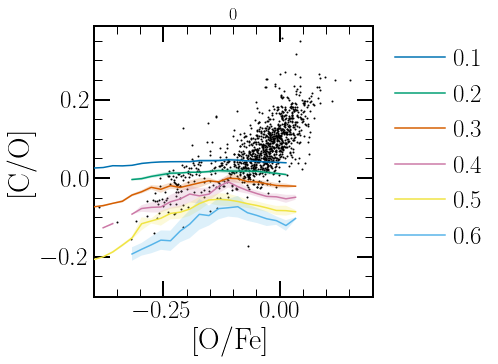

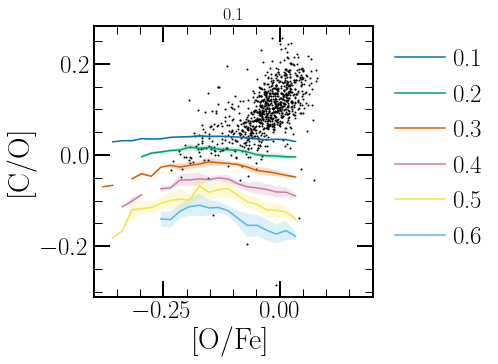

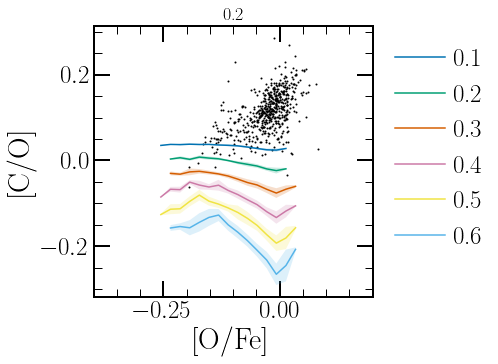

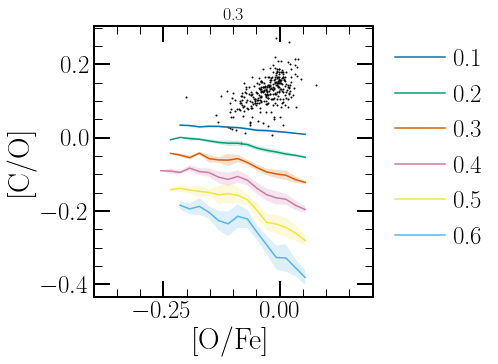

<Figure size 360x360 with 0 Axes>

In [5]:
for o_0 in [-0.2, -0.1, 0, 0.1, 0.2, 0.3]:
    plt.title(o_0)
    mc.plot_coofe_stars(fe_0 = o_0, solar_neighborhood=True)

[O/H] =  -0.2


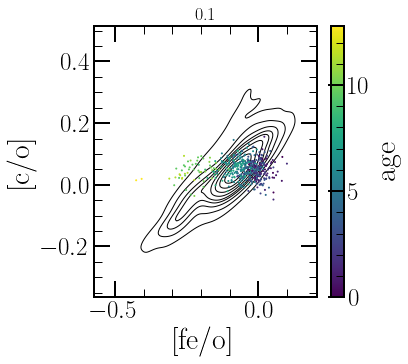

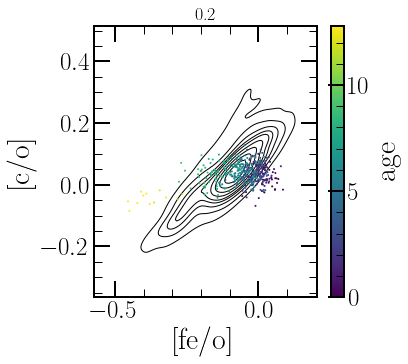

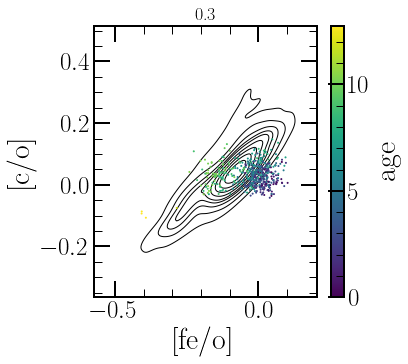

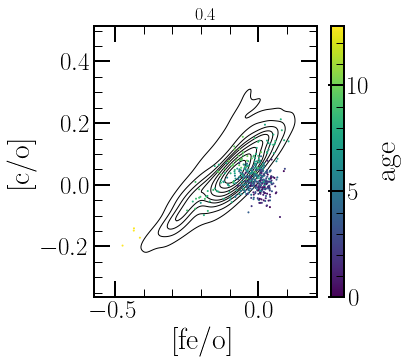

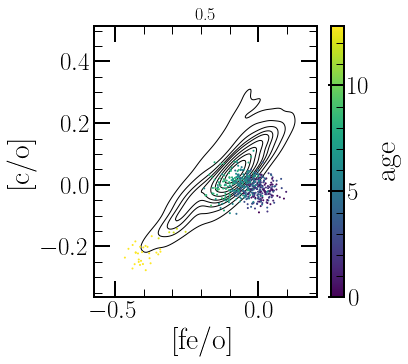

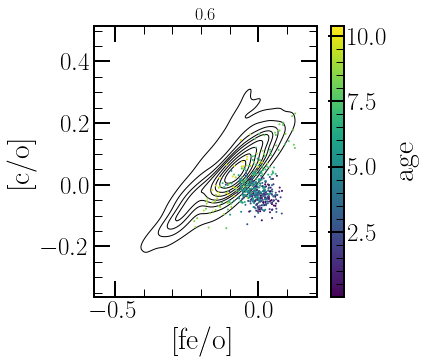

[O/H] =  -0.1


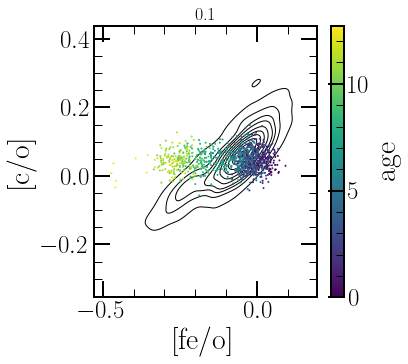

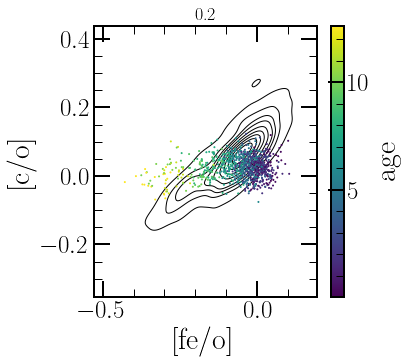

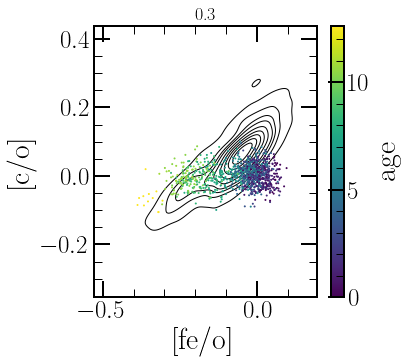

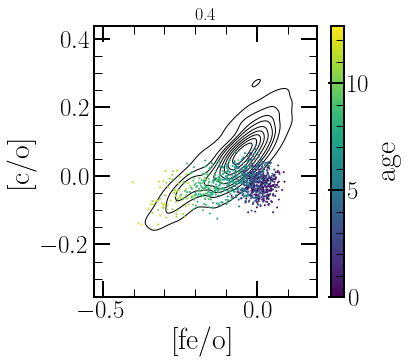

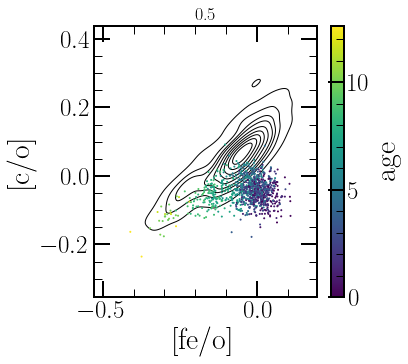

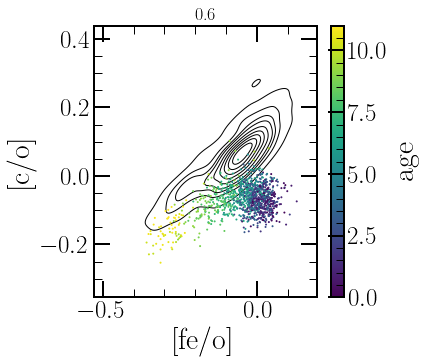

[O/H] =  0


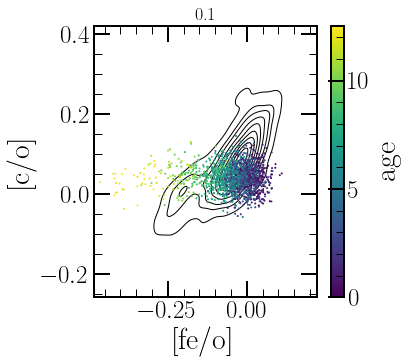

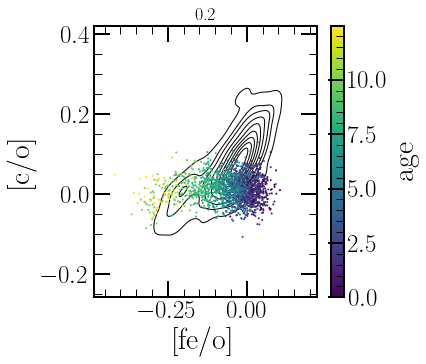

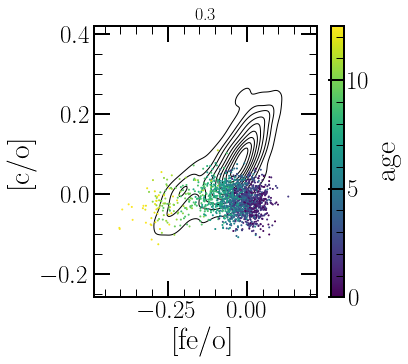

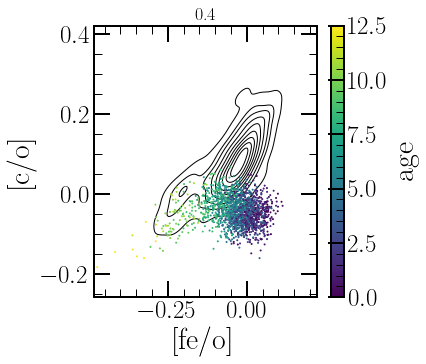

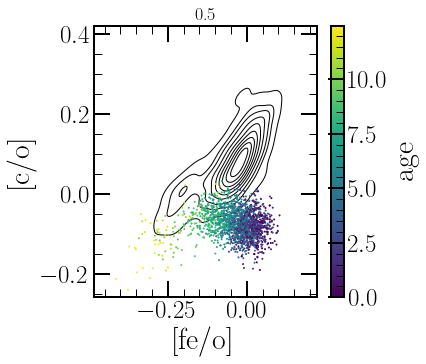

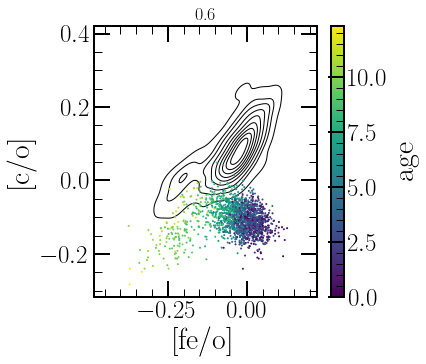

[O/H] =  0.1


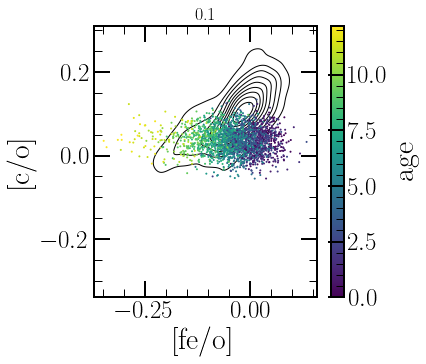

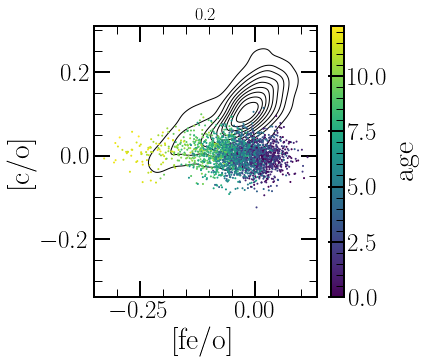

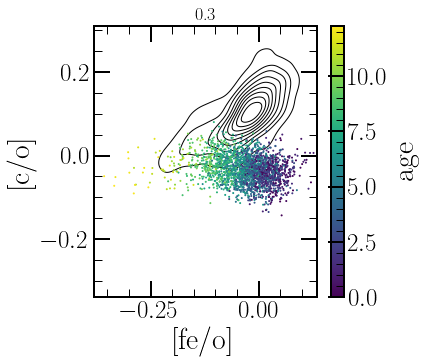

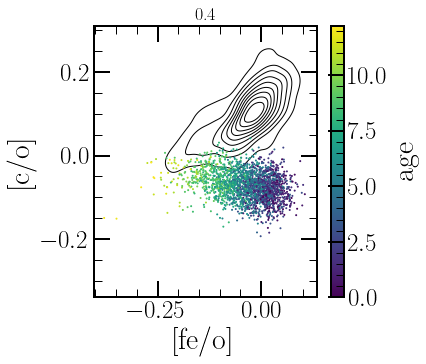

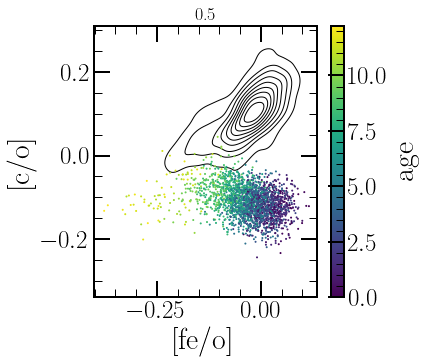

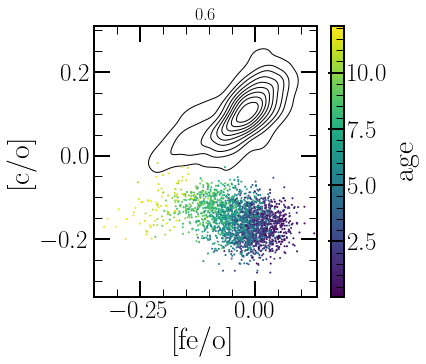

[O/H] =  0.2


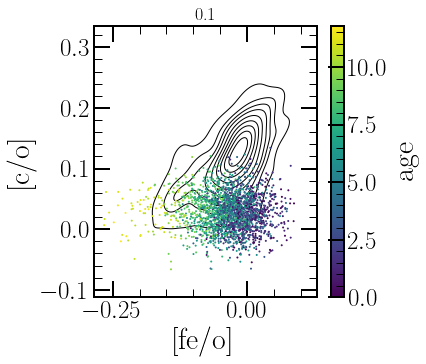

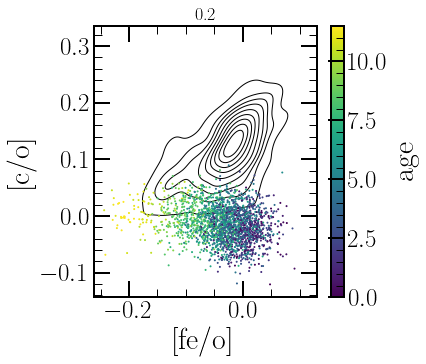

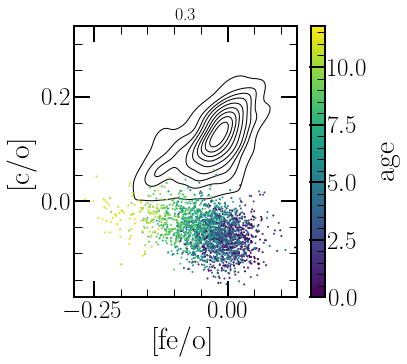

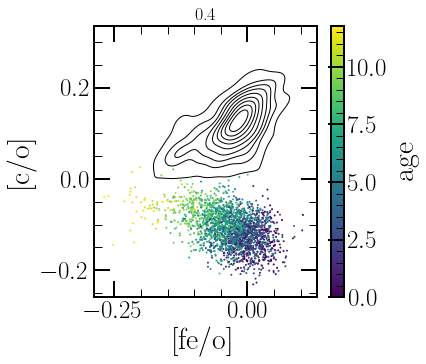

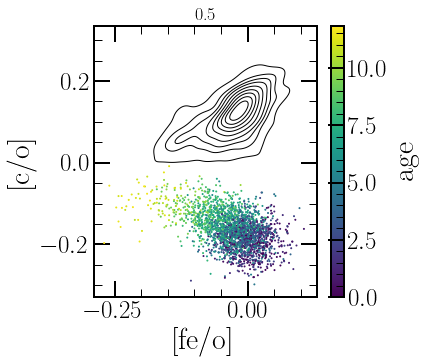

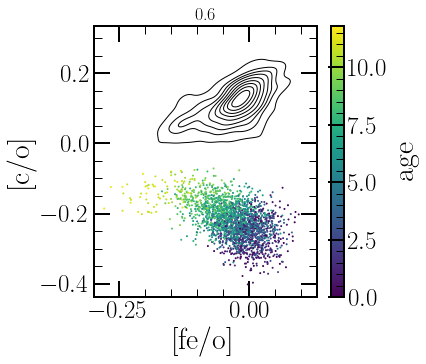

[O/H] =  0.3


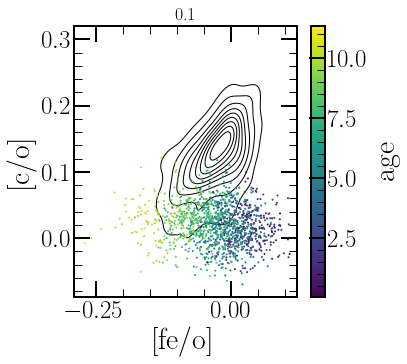

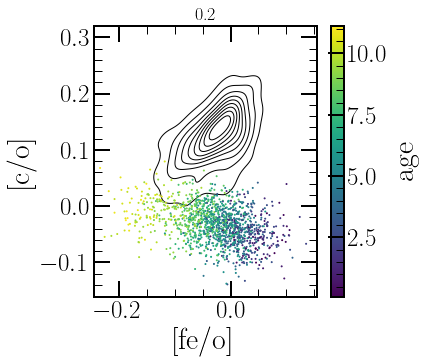

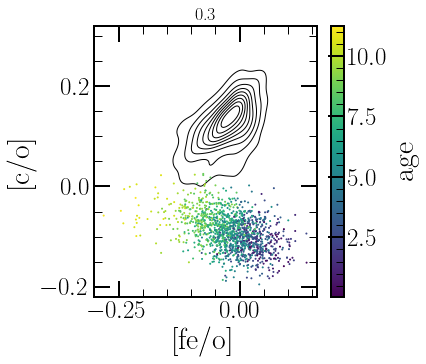

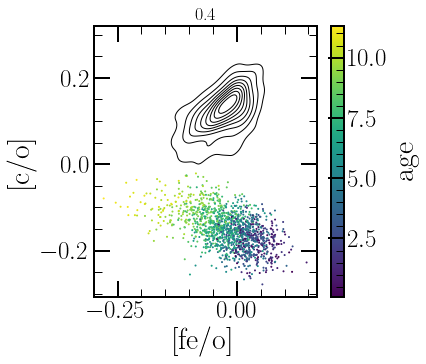

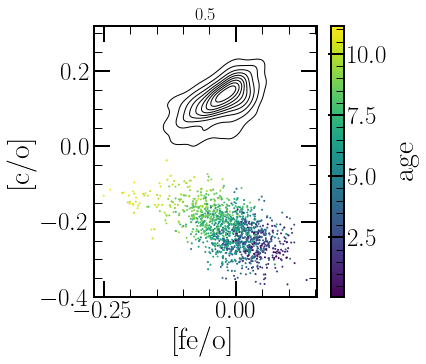

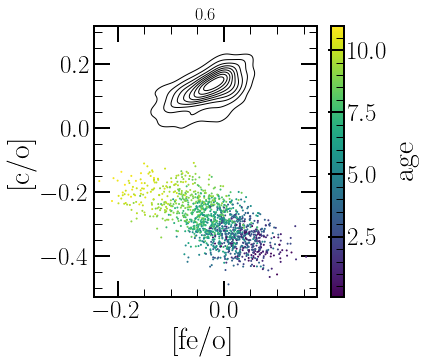

In [6]:
for o_0 in [-0.2, -0.1, 0, 0.1, 0.2, 0.3]:
    print("[O/H] = ", o_0)
    mc.plot_coofe(solar_neighborhood=True, fe_h_0=o_0)

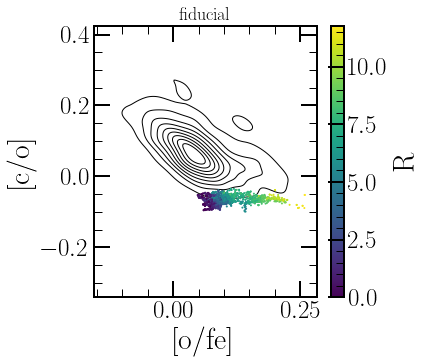

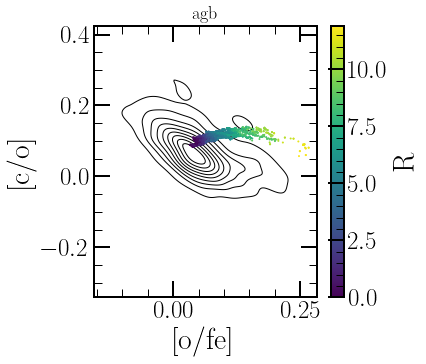

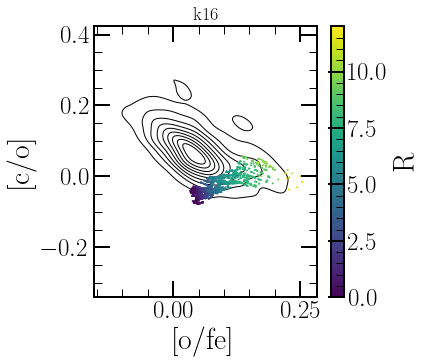

In [62]:
mc.plot_coofe()

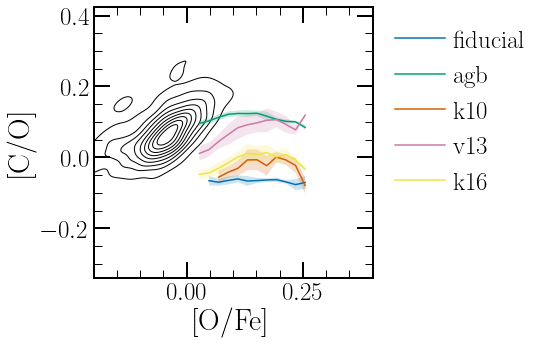

<Figure size 360x360 with 0 Axes>

In [111]:
mc.plot_coofe_stars()

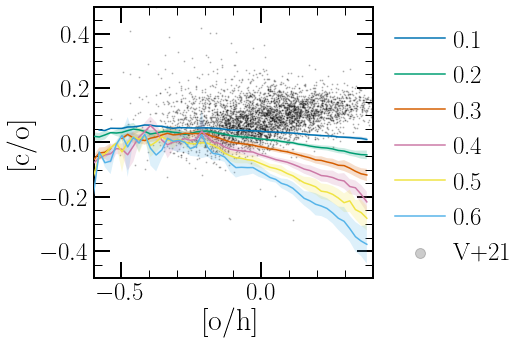

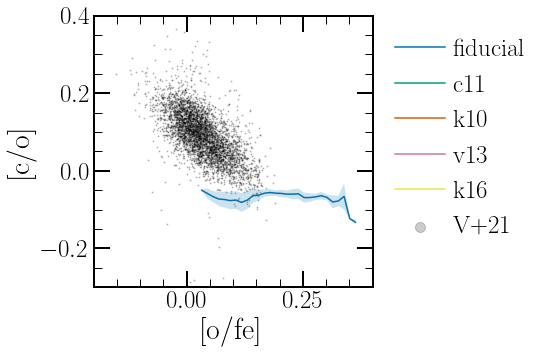

saved


In [8]:
fig, ax = plt.subplots()
ax.set_ylim(-0.3, 0.4)

mc.plot_mean_stars("[o/fe]", "[c/o]", xlim=(-0.2, 0.4), ax=ax, filename="coofe_stars_eta")

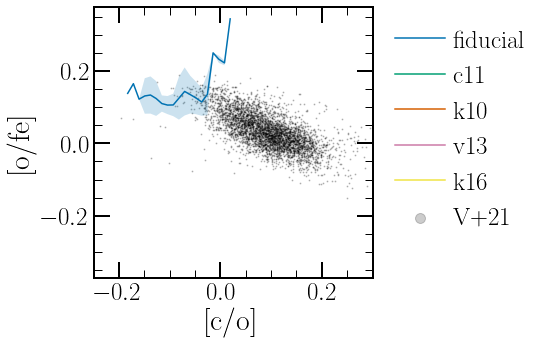

<Figure size 576x432 with 0 Axes>

In [9]:
mc.plot_mean_stars("[c/o]", "[o/fe]", xlim=(-0.25, 0.3))

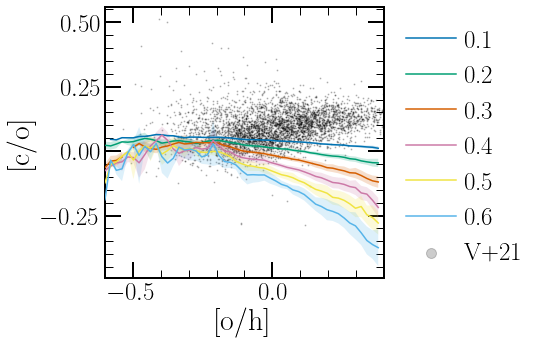

<Figure size 576x432 with 0 Axes>

In [7]:
mc.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4))

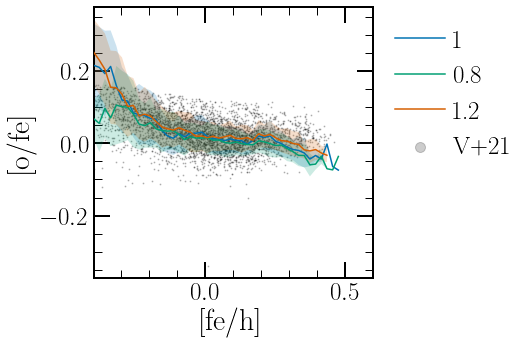

saved


In [33]:
fig, ax = plt.subplots()
mc.plot_mean_stars("[fe/h]", "[o/fe]", xlim=(-0.4, 0.6), ax=ax)

# What is eta precicely?

No handles with labels found to put in legend.


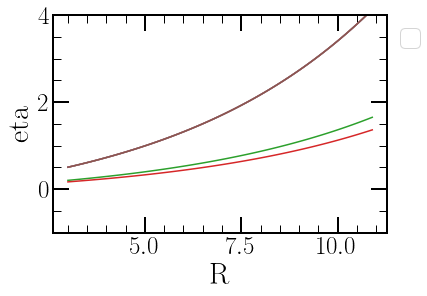

In [11]:
eta_0 = []
r_eff_0 = []
r = np.arange(30, 110)
for i in r:
    eta_0.append( mc.models["fiducial"].zones["zone%i" % i].history["eta_0"][-1])
    r_eff_0.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

#_eff_0 = 0.4
eta_0 = np.array(eta_0)
denom_0 = 1 + eta_0 - r_eff_0


def plot_eta(model):
    eta = []
    r_eff = []
    r = np.arange(30, 110)
    for i in r:
        eta.append( mc.models[model].zones["zone%i" % i].history["eta_0"][-1])
        r_eff.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])
    denom = 1 + np.array(eta) - r_eff
    #, = plt.plot(r/10, r_eff, label=mc.models[model].label)
    plt.plot(r/10, np.array(eta))

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel("eta")

pii = 0.33

#plt.plot(r/10, np.array(eta), label="test")
plt.ylim(-1, 4)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.savefig("figures/eta_vs_r.jpeg")

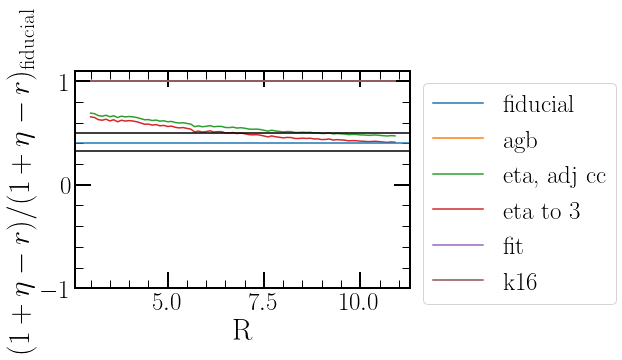

In [12]:
eta_0 = []
r_eff_0 = []
r = np.arange(30, 110)
for i in r:
    eta_0.append( mc.models["fiducial"].zones["zone%i" % i].history["eta_0"][-1])
    r_eff_0.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

eta_0 = np.array(eta_0)

denom_0 = 1 + eta_0 - r_eff_0


def plot_eta(model):
    eta = []
    r_eff = []
    r = np.arange(30, 110)
    for i in r:
        eta.append( mc.models[model].zones["zone%i" % i].history["eta_0"][-1])
        r_eff.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

    denom = 1 + np.array(eta) - r_eff
    p, = plt.plot(r/10, denom/denom_0, label=mc.models[model].label)

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel(r"$(1+\eta - r)/(1+\eta-r)_\text{fiducial}$")
plt.axhline(0.5, color="k")
plt.axhline(0.33, color="k")
plt.axhline(1/2.5)

# plt.plot(r/10,  (1+eta_0 - r_eff_0)/denom_0, label="test")
plt.ylim(-1, 1.1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


plt.savefig("figures/depletion.jpeg")

# Gas phase tracks

In [22]:
import plotting_utils

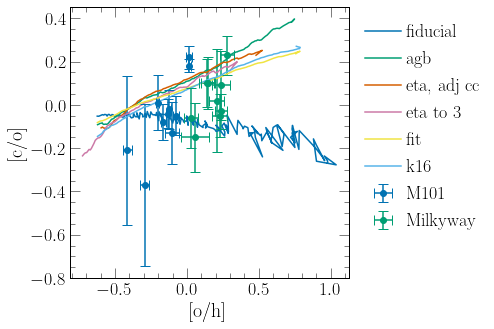

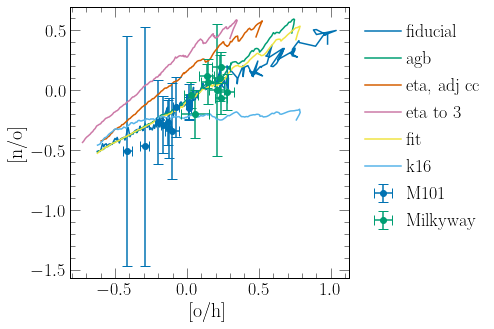

In [20]:
mc.plot_gas("[o/h]", "[c/o]", filename="analytic_gas")
mc.plot_gas("[o/h]", "[n/o]")
# mc.plot_gas("[fe/h]", "[c/n]")

# MDFs

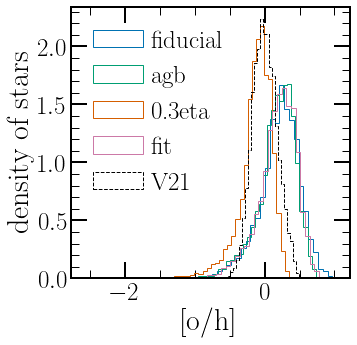

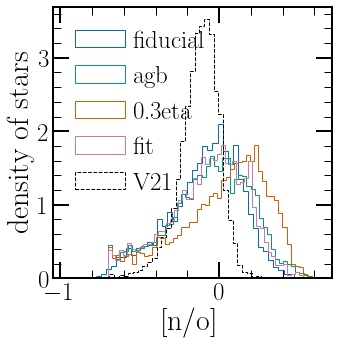

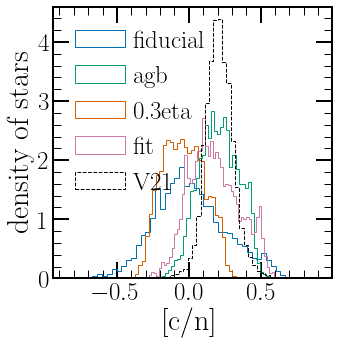

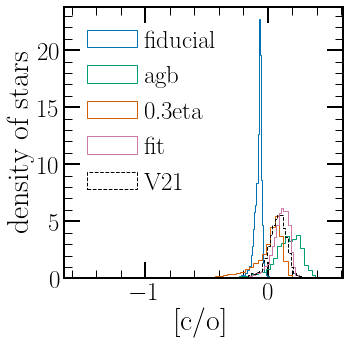

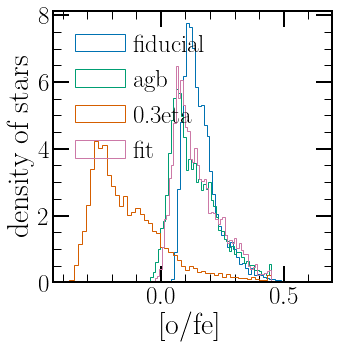

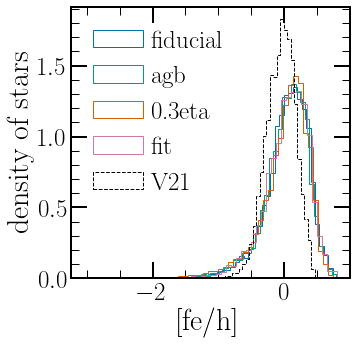

In [23]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")
mc.plot_mdf("[o/fe]")
mc.plot_mdf("[fe/h]")

# Stars

In [12]:
import numpy as np

In [45]:

def o_fe_cutoff(fe_h):
    return 0.12 - (fe_h < 0) * 0.13 * fe_h

fe_h = np.linspace(-2, 0.5, 100)
plt.plot(fe_h, o_fe_cutoff(fe_h))
mc.plot_stars("[fe/h]", "[o/fe]", c="high_alpha")

RuntimeError: latex was not able to process the following string:
b'high_alpha'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/f95333a13fcdc2effa43f2294ab7
307b.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file f95333a13fcdc2effa43f2294ab7307b.aux.
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily high_
                     alpha}
No pages of output.
Transcript written on f95333a13fcdc2effa43f2294ab7307b.log.




<Figure size 432x288 with 2 Axes>

RuntimeError: latex was not able to process the following string:
b'high_alpha'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/f95333a13fcdc2effa43f2294ab7
307b.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./f95333a13fcdc2effa43f2294ab7307b.aux)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily high_
                     alpha}
No pages of output.
Transcript written on f95333a13fcdc2effa43f2294ab7307b.log.




<Figure size 432x288 with 2 Axes>

RuntimeError: latex was not able to process the following string:
b'high_alpha'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/f95333a13fcdc2effa43f2294ab7
307b.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./f95333a13fcdc2effa43f2294ab7307b.aux)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily high_
                     alpha}
No pages of output.
Transcript written on f95333a13fcdc2effa43f2294ab7307b.log.




<Figure size 432x288 with 2 Axes>

RuntimeError: latex was not able to process the following string:
b'high_alpha'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/f95333a13fcdc2effa43f2294ab7
307b.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./f95333a13fcdc2effa43f2294ab7307b.aux)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily high_
                     alpha}
No pages of output.
Transcript written on f95333a13fcdc2effa43f2294ab7307b.log.




<Figure size 432x288 with 2 Axes>

RuntimeError: latex was not able to process the following string:
b'high_alpha'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/f95333a13fcdc2effa43f2294ab7
307b.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./f95333a13fcdc2effa43f2294ab7307b.aux)
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily high_
                     alpha}
No pages of output.
Transcript written on f95333a13fcdc2effa43f2294ab7307b.log.




<Figure size 432x288 with 2 Axes>

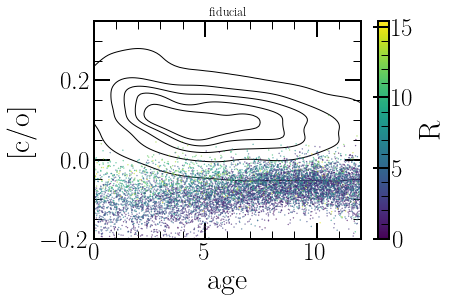

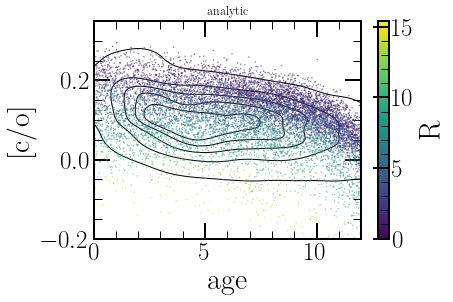

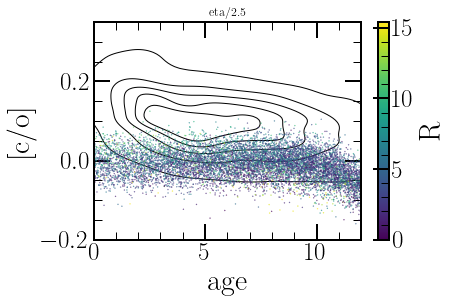

In [22]:
mc.plot_stars("age", "[c/o]", c="R_origin", c_label="R", xlim=(0, 12), ylim=(-0.2, 0.35))

In [13]:
import apogee_analysis as aah

In [14]:
v21 = aah.vincenzo2021()

(-0.1, 0.4)

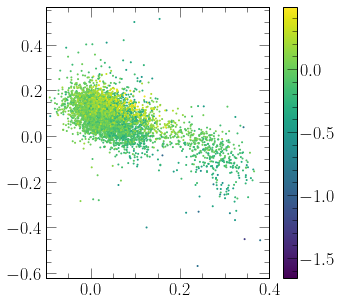

In [30]:
plt.scatter(v21["[mg/fe]"], v21["[c/o]"], s=1, c=v21["[o/h]"])
plt.colorbar()
plt.xlim(-0.1,0.4)

(-0.1, 0.4)

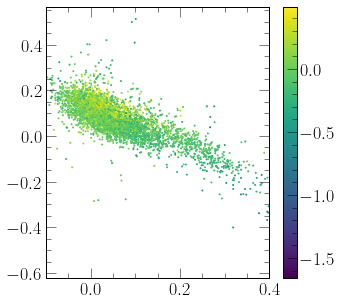

In [31]:
plt.scatter(v21["[o/h]"] - v21["[fe/h]"], v21["[c/o]"], s=1, c=v21["[o/h]"])
plt.colorbar()
plt.xlim(-0.1,0.4)

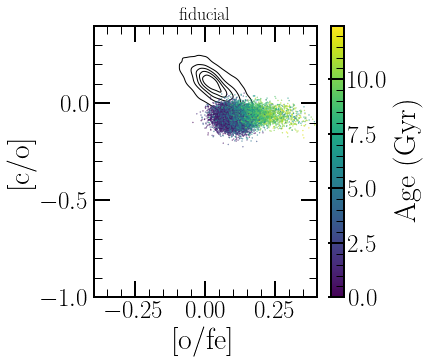

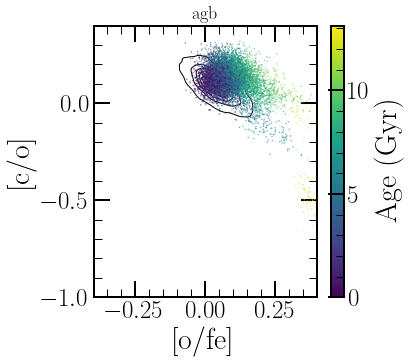

In [37]:
mc.plot_stars("[o/fe]", "[c/o]", c="age", xlim=(-0.4, 0.4), ylim=(-1, 0.4), c_label="Age (Gyr)", solar_neighborhood=True, filename="coofe_stars")

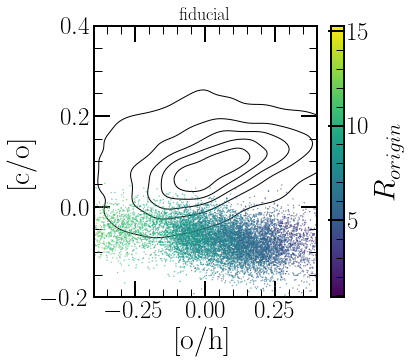

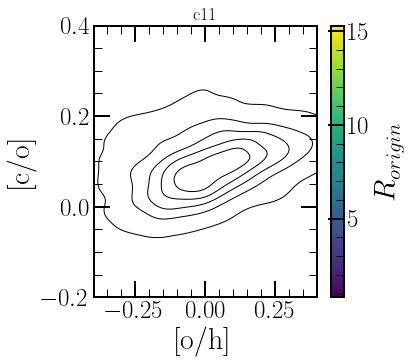

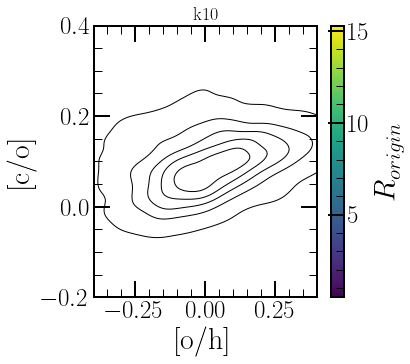

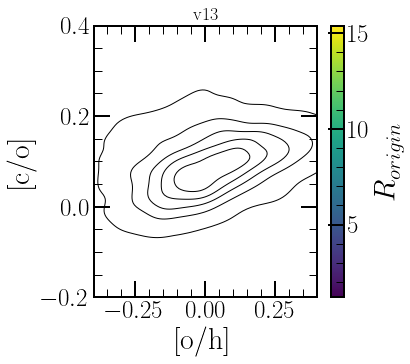

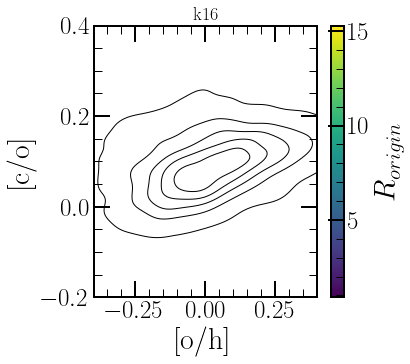

In [25]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", xlim=(-0.4, 0.4), ylim=(-0.2, 0.4), c_label="$R_{origin}$", solar_neighborhood=True, filename="cooh_stars_analytic")

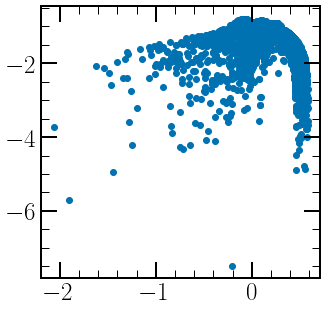

In [29]:
plt.scatter(s["[o/h]"], s["[c/o]"])

In [27]:
s = mc.stars["k16"]

In [56]:
high_alpha = s.filter("high_alpha", ">", 0)
low_alpha = s.filter("high_alpha", "=", 0)

In [57]:
from model_comparer import means_star_value

In [58]:
import numpy as np

In [60]:
bins = np.linspace(-0.4,0.4,50)
means, sds = means_star_value(high_alpha, "[c/o]", "[o/h]", bins=bins)
means_low, sds_low = means_star_value(low_alpha, "[c/o]", "[o/h]", bins=bins)
o_h = 0.5*(bins[1:] + bins[:-1])


(-0.4, 0.6)

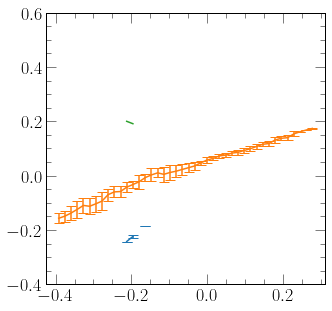

In [61]:
plt.errorbar(o_h, means, yerr=sds)
plt.errorbar(o_h, means_low, yerr=sds_low)
plt.plot(o_h, means_low - means)
plt.ylim(-0.4, 0.6)

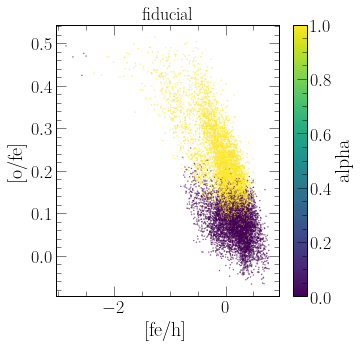

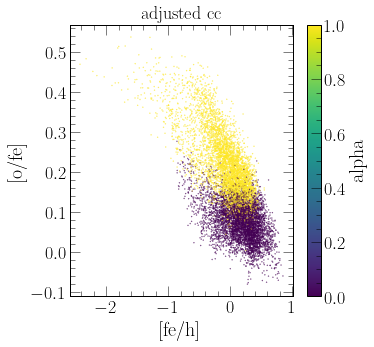

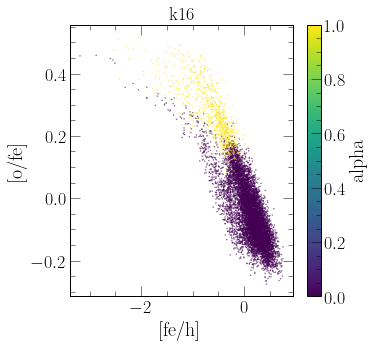

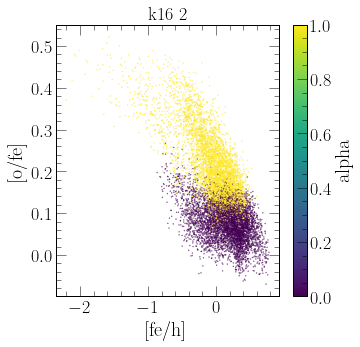

In [161]:
mc.plot_stars("[fe/h]", "[o/fe]", c="high_alpha", c_label="alpha")

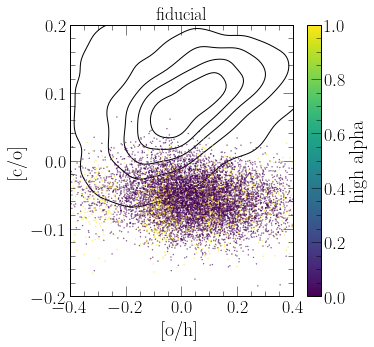

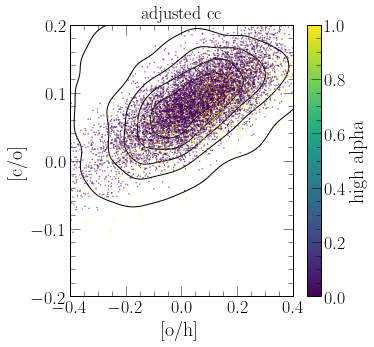

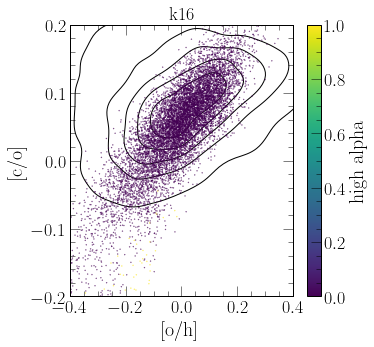

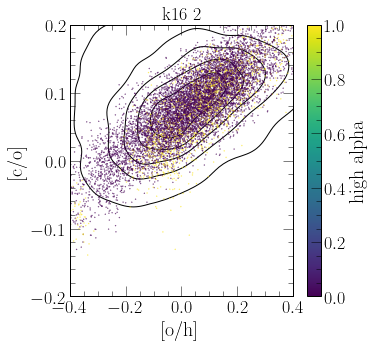

In [162]:
mc.plot_stars("[o/h]", "[c/o]", c="high_alpha", c_label="high alpha", xlim=(-0.4, 0.4), ylim=(-0.2, 0.2), solar_neighborhood=True, filename="cooh_gas_analytic_alpha")

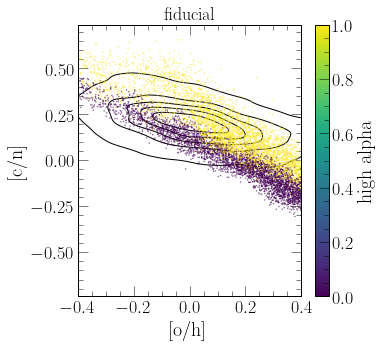

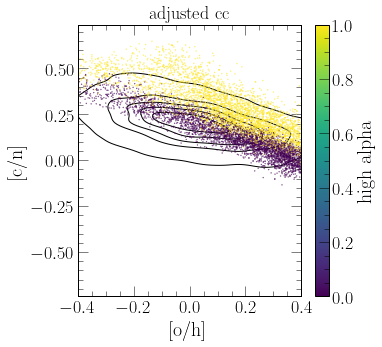

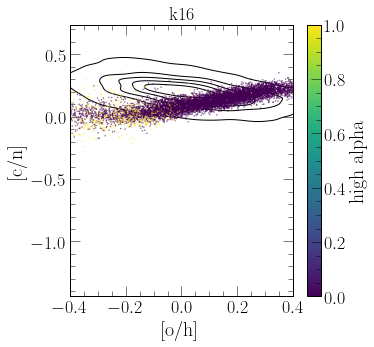

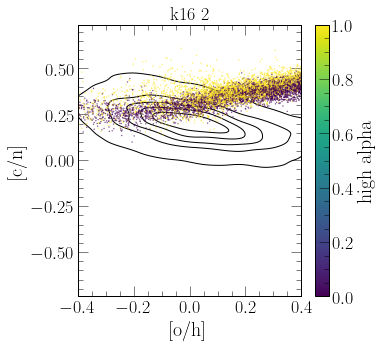

In [163]:
mc.plot_stars("[o/h]", "[c/n]", c="high_alpha", c_label="high alpha", xlim=(-0.4, 0.4), filename="cnoh_gas_analytic_alpha")

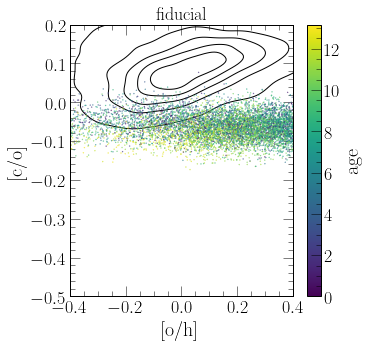

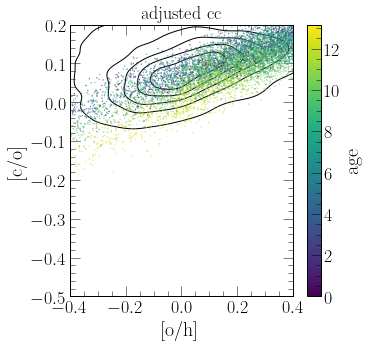

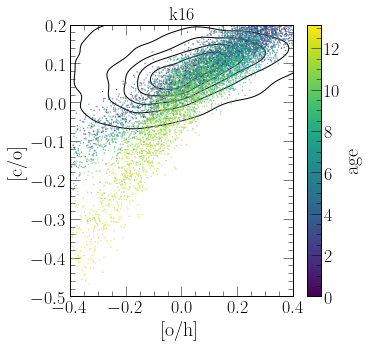

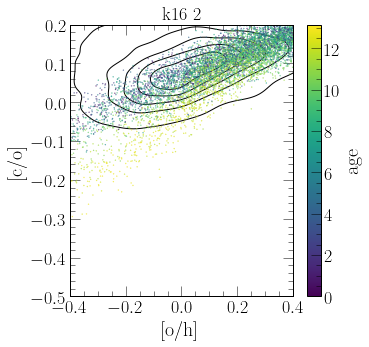

In [164]:
mc.plot_stars("[o/h]", "[c/o]", c="age", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))

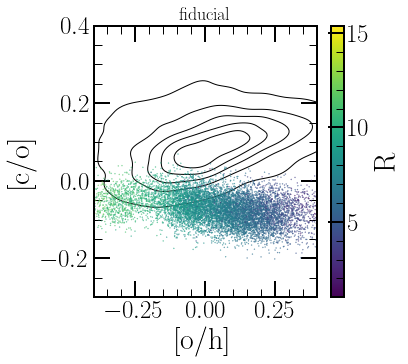

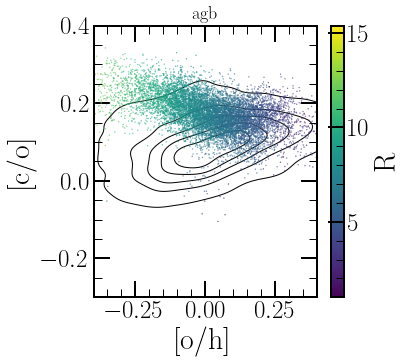

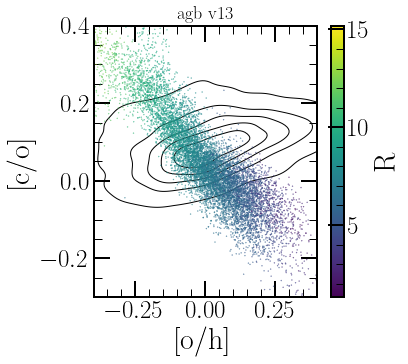

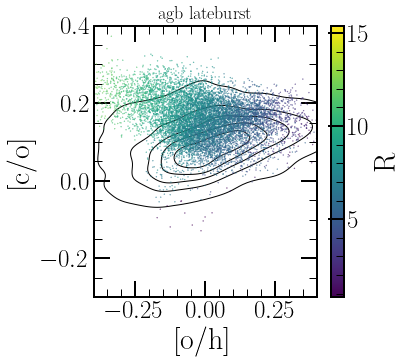

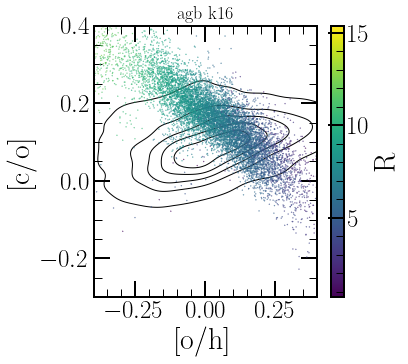

In [61]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", c_label="R", xlim=(-0.4, 0.4), ylim=(-0.3, 0.4), solar_neighborhood=True)

# Gas phase tracks

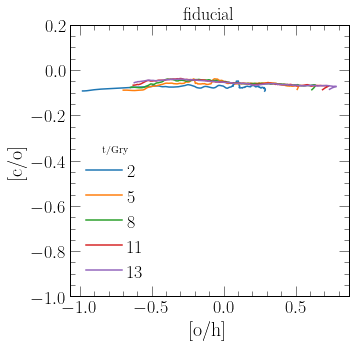

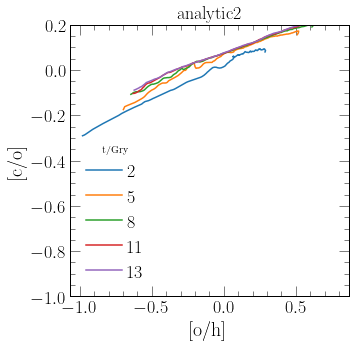

RuntimeError: latex was not able to process the following string:
b'k16_analytic'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/daniel/.cache/matplotlib/tex.cache/1333e7ebea458de79817fadbcd86dcac.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 1333e7ebea458de79817fadbcd86dcac.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily k16_
                    analytic}
No pages of output.
Transcript written on 1333e7ebea458de79817fadbcd86dcac.log.




<Figure size 360x360 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'k16_a2'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/daniel/.cache/matplotlib/tex.cache/294cfa213dbcb2a41acc746ace61d78a.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 294cfa213dbcb2a41acc746ace61d78a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily k16_
                    a2}
No pages of output.
Transcript written on 294cfa213dbcb2a41acc746ace61d78a.log.




<Figure size 360x360 with 1 Axes>

In [167]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

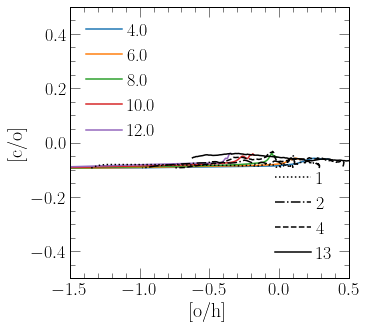

In [168]:
plt.xlim(-1.5, 0.5)
plt.ylim(-0.5, 0.5)
mc.plot_model_time_evolution("fiducial", filename="evolution_tracks_fiducial")


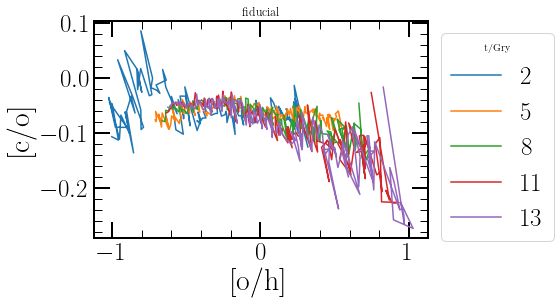

In [17]:
mc.plot_model_fixed_t("fiducial", "[o/h]", "[c/o]", filename="cooh_fixed_t_fiducial")

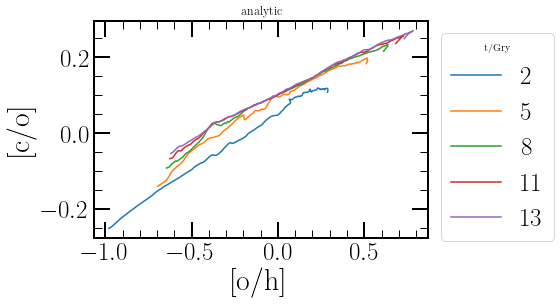

In [16]:
mc.plot_model_fixed_t("analytic", "[o/h]", "[c/o]", filename="cooh_fixed_t_analytic")

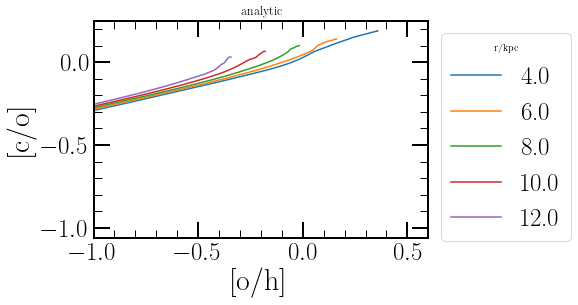

In [15]:
mc.plot_model_fixed_r("analytic", "[o/h]", "[c/o]", filename="cooh_fixed_r_analytic")

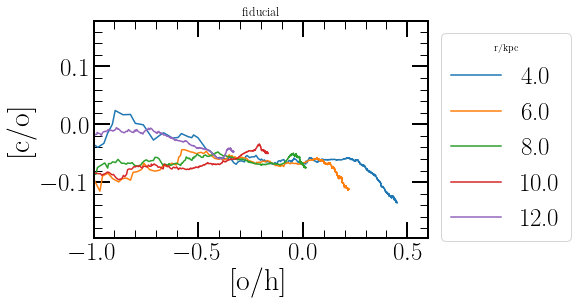

In [14]:
mc.plot_model_fixed_r("fiducial", "[o/h]", "[c/o]", filename="cooh_fixed_r_fiducial")

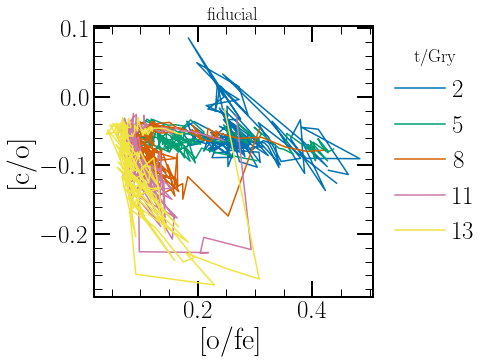

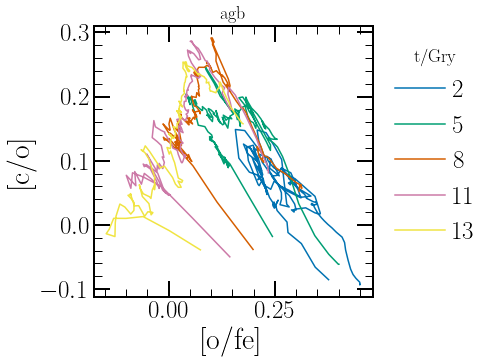

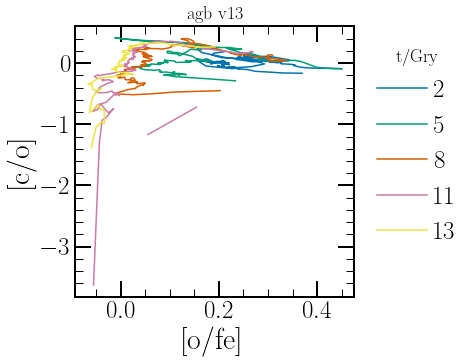

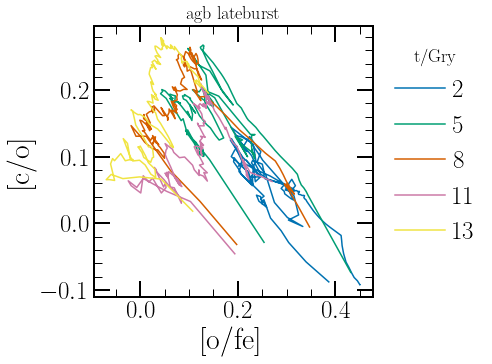

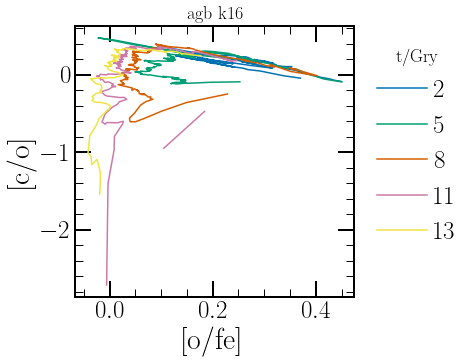

In [17]:
import apogee_analysis as aah

for model_name in mc.models.keys():
    mc.plot_model_fixed_t(model_name, "[o/fe]", "[c/o]")

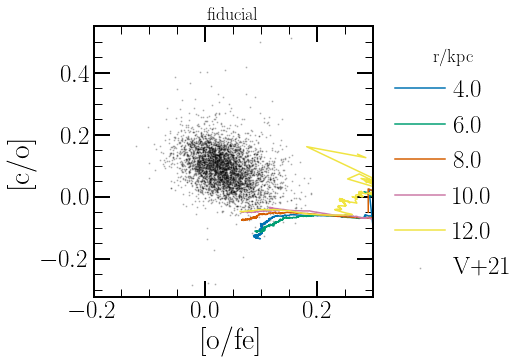

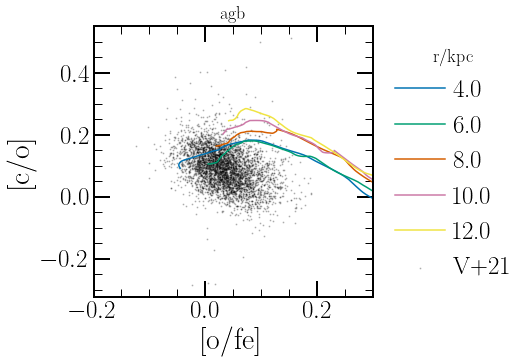

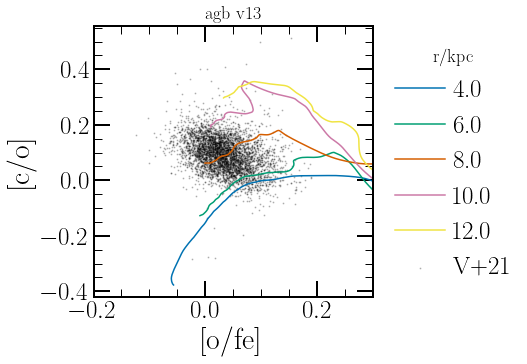

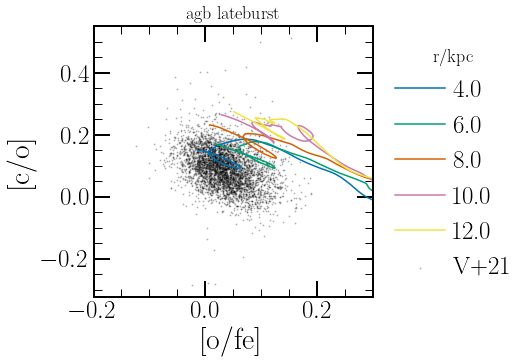

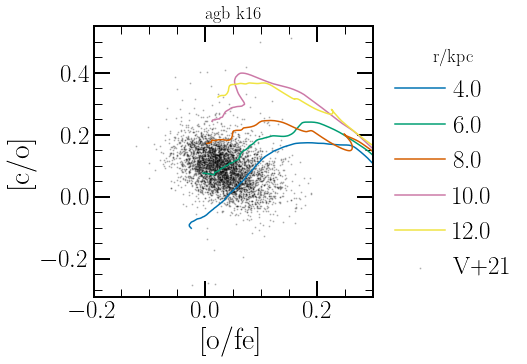

In [25]:
import apogee_analysis as aah

for model_name in mc.models.keys():
    aah.plot_v21("[mg/fe]", "[c/o]")
    mc.plot_model_fixed_r(model_name, "[o/fe]", "[c/o]")
    plt.xlim(-0.2, 0.3)
    plt.show()



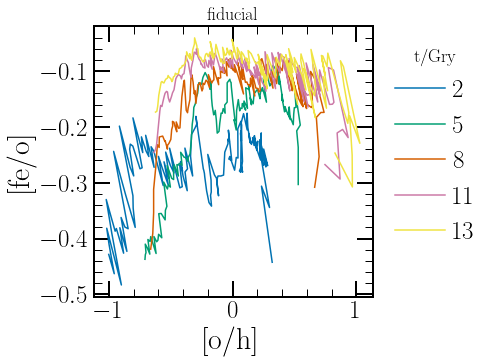

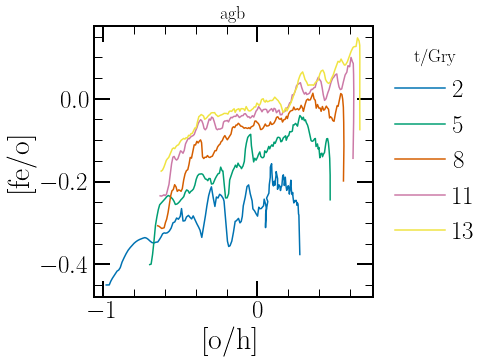

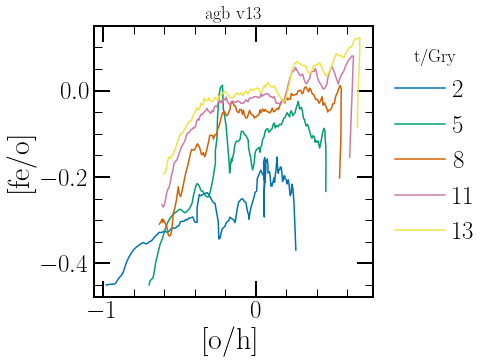

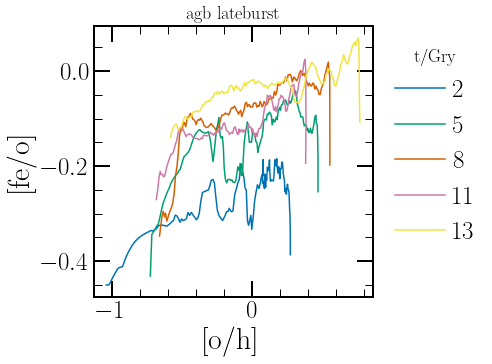

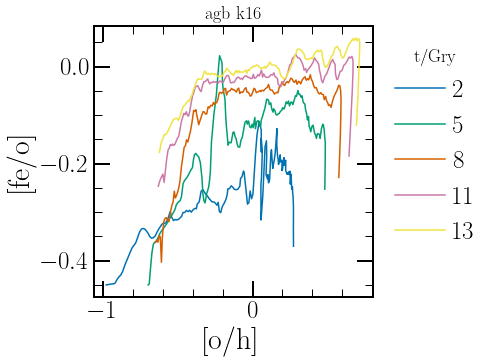

In [33]:
for model_name in mc.models.keys():
    # aah.plot_v21("[mg/fe]", "[c/o]")
    mc.plot_model_fixed_t(model_name, "[o/h]", "[fe/o]")

    plt.show()

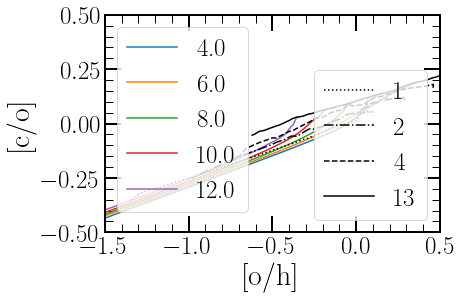

In [6]:
plt.xlim(-1.5, 0.5)
plt.ylim(-0.5, 0.5)
mc.plot_model_time_evolution("analytic", filename="evolution_tracks_analytic")


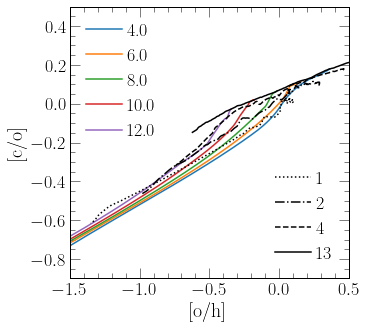

In [171]:
plt.xlim(-1.5, 0.5)
plt.ylim(-0.9, 0.5)
mc.plot_model_time_evolution("k16_a2", filename="evolution_tracks_analytic")


# Let's calculate fagb

In [58]:
import numpy as np

In [187]:
mc.models

{'fiducial': <VICE multioutput from multizone: output/fiducial>,
 'analytic2': <VICE multioutput from multizone: output/analytic2>,
 'k16_analytic': <VICE multioutput from multizone: output/k16_analytic>,
 'k16_a2': <VICE multioutput from multizone: output/k16_a2>}

In [77]:
mc.models

{'fiducial': <VICE multioutput from multizone: output/fiducial>,
 'tripled_agb_analytic': <VICE multioutput from multizone: output/tripled_agb_analytic>,
 'tripled_agb_k16': <VICE multioutput from multizone: output/tripled_agb_k16>}

In [75]:


def y_c_cc(Z):
    #k16 
    return 0.044*Z**0.625




def y_c_cc(Z):
    #k16 2
    return 0.033*Z**0.37

def y_c_cc(Z):
    # adjusted cc
    return 0.02*Z**0.25

def y_c_cc(Z):
    return 0.005 * 1.12

y_o_cc = 0.015


h = mc.models["c11_f_0_2"].zones["zone80"].history


sfr = np.array(h["sfr"][:-1])
z_o = np.array(h["z(o)"][1:])
z_c = np.array(h["z(c)"][1:])
z = 0.014*10**np.array(h["[m/h]"][:-1])
eta = np.array(h["eta_0"][1:])
r = np.array(h["r_eff"][1:])
t = h["time"][:-1]

dt = (t[1] - t[0])*10**9
m_dot_o = (h["mass(o)"][1:] - np.array(h["mass(o)"][:-1]))/dt
m_dot_c = (h["mass(c)"][1:] - np.array(h["mass(c)"][:-1]))/dt

m_dot_o_pred = sfr*( y_o_cc - z_o*(1 + eta - r))

m_dot_c_out = - sfr * z_c*(1 + eta - r)
m_dot_c_cc = sfr*y_c_cc(z)
m_dot_c_agb = m_dot_c - m_dot_c_cc - m_dot_c_out
m_dot_c_total = m_dot_c_cc + m_dot_c_agb

In [76]:
w = 100
def moving_average(x):
    return np.convolve(x, np.ones(w), "valid")/w

t2 = t[:-w+1]
m_dot_c_cc2 = moving_average(m_dot_c_cc)
m_dot_c_agb2 = moving_average(m_dot_c_agb)
m_dot_c_total2 = moving_average(m_dot_c_total)

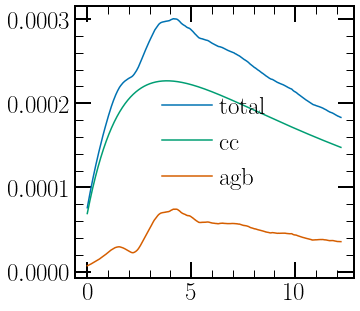

In [77]:
plt.plot(t2, m_dot_c_total2, label="total")
plt.plot(t2, m_dot_c_cc2, label="cc")
plt.plot(t2, m_dot_c_agb2, label="agb")
plt.legend()

Text(0, 0.5, '$f_\\text{agb}$')

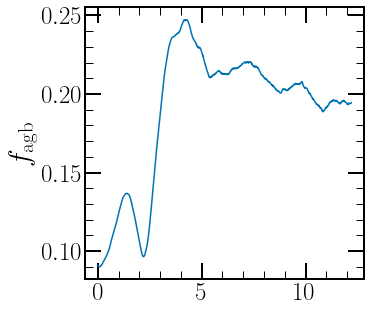

In [78]:
plt.plot(t2, m_dot_c_agb2/m_dot_c_total2)
plt.ylabel(r"$f_\text{agb}$")

In [ ]:
plt.plot(t, m_dot_o)
plt.plot(t, m_dot_o_pred)

In [ ]:
mstar_dot = np.array(h["mstar"][1:]) - np.array(h["mstar"][:-1])

In [44]:
import apogee_analysis as aah
v21 = aah.vincenzo2021()

In [45]:
from scipy import stats

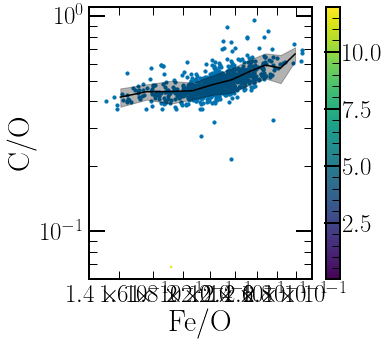

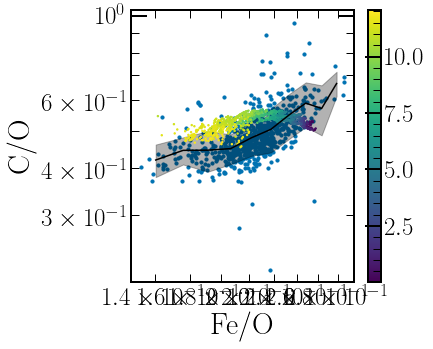

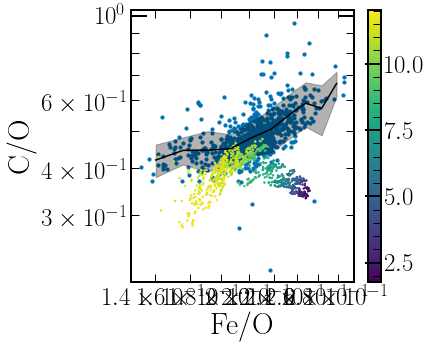

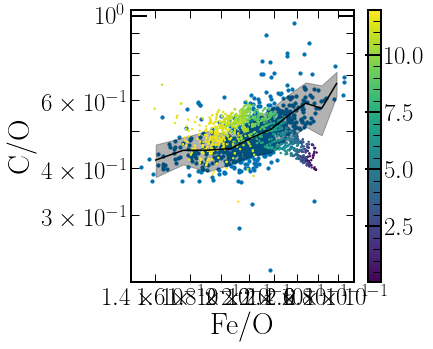

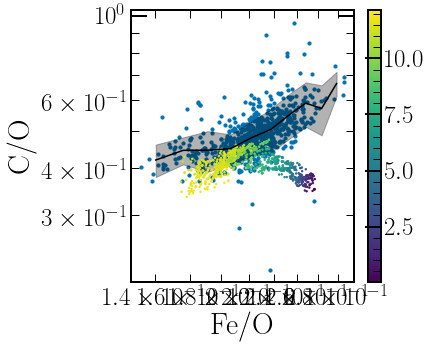

In [84]:
for name in mc.stars.keys():
    s = mc.stars[name]
    filt = v21["[fe/h]"] > -0.15
    filt &= v21["[fe/h]"] < -0.05
    df1 = v21[filt]
    # plt.scatter(10**-df1["[o/fe]"], 10**df1["[c/o]"], s=10, c="black")
    
    x = aah.bracket_to_abundance(-np.array(df1["[o/fe]"]), "fe", "o")
    y = aah.bracket_to_abundance(np.array(df1["[c/o]"]), "c", "o")
    
    means, bins, counts = stats.binned_statistic(x, y, statistic="mean")
    std, _, _ = stats.binned_statistic(x, y, statistic="std")
    o_fe = 0.5*(bins[1:] + bins[:-1])

    plt.scatter(x, y, s=10)
    plt.plot(o_fe, means, zorder=5, color="k")
    plt.fill_between(o_fe, means-std, (means+std), alpha=0.3, color="black")

    df = s.filter("[fe/h]", ">", -0.15)
    df = df.filter("[fe/h]", "<", -0.05)
    
    x = aah.bracket_to_abundance(-np.array(df["[o/fe]"]), "fe", "o")
    y = aah.bracket_to_abundance(np.array(df["[c/o]"]), "c", "o")
    if name=="fiducial":
        y -= 0.005/0.015
    
    plt.scatter(x + 0.05, y, s=2, c=df["age"])
    plt.colorbar()
    plt.xlabel("Fe/O")
    plt.ylabel("C/O")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [ ]:
filt = v21["[fe/h]"] > -0.15
filt &= v21["[fe/h]"] < -0.05
df1 = v21[filt]
plt.scatter(10**df1["[o/fe]"], 10**df1["[c/o]"], s=10, c=df1["age"])
plt.colorbar()